In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data = data.sort_values('Date')

data = data.drop('Date', axis=1)

# Scaling
scaler = MinMaxScaler()
data = scaler.fit_transform(data)





data1 = pd.read_excel('Google_stock.xlsx')

#Sort the data by date
data1 = data1.sort_values('Date')




In [3]:
to5=[]
just6=[]
for i in data:
    to5.append(i[0:5])
    just6.append(i[5])


X_train, X_test, Y_train, Y_test = train_test_split(to5, just6, test_size=0.1, random_state=32)





X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data1[['Open', 'High', 'Low', 'Close', 'Adj Close']], data1['Volume'], test_size=0.1, random_state=32)


In [4]:

X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)


X_train1=np.array(X_train1)
X_test1=np.array(X_test1)
Y_train1=np.array(Y_train1)
Y_test1=np.array(Y_test1)


In [5]:
#Reshape the input data to be 3D

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=80, return_sequences=True, input_shape=(5, 1)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.GRU(units=80),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(6)
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/100
39/39 [==============================] - 31s 139ms/step - loss: 0.0066 - val_loss: 0.0032
Epoch 2/100
39/39 [==============================] - 1s 26ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 3/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 4/100
39/39 [==============================] - 1s 28ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 5/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0043 - val_loss: 0.0031
Epoch 6/100
39/39 [==============================] - 1s 26ms/step - loss: 0.0043 - val_loss: 0.0034
Epoch 7/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 8/100
39/39 [==============================] - 1s 27ms/step - loss: 0.0042 - val_loss: 0.0033
Epoch 9/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 10/100
39/39 [==============================] - 1s 25ms/step - loss: 0.0041 - val_loss: 0.00

In [9]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Scale the predictions back to the original range
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:, -1]


5/5 [==============================] - 2s 7ms/step


In [10]:
r2 = r2_score(Y_test1, predictions)
print("R2 score: {:.2f}%".format(r2*100))

R2 score: 38.69%


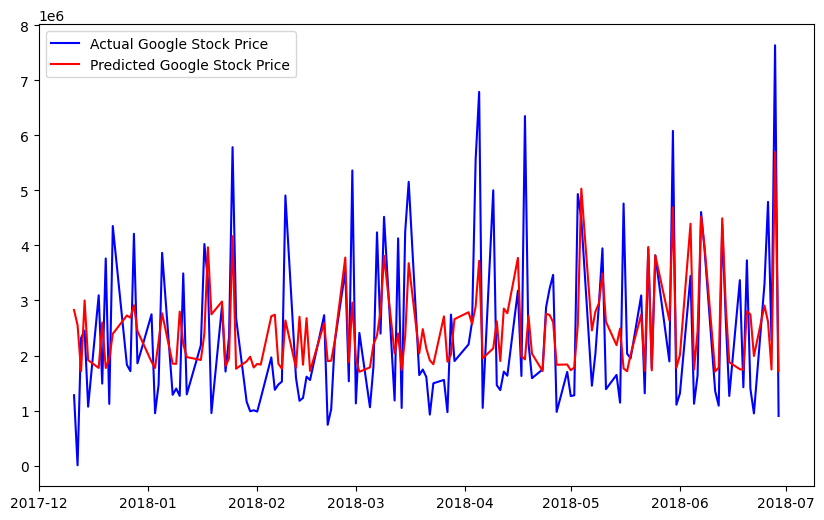

In [11]:
plt.figure(figsize=(10,6))
plt.plot(data1['Date'][len(data1)-len(Y_test1):], Y_test1, color='blue', label='Actual Google Stock Price')
plt.plot(data1['Date'][len(data1)-len(predictions):], predictions, color='red', label='Predicted Google Stock Price')
plt.legend()
plt.show()
